## Ensemble Learning | Machine Learning in Python | KGP Talkie 

### What is Ensemble Learning 

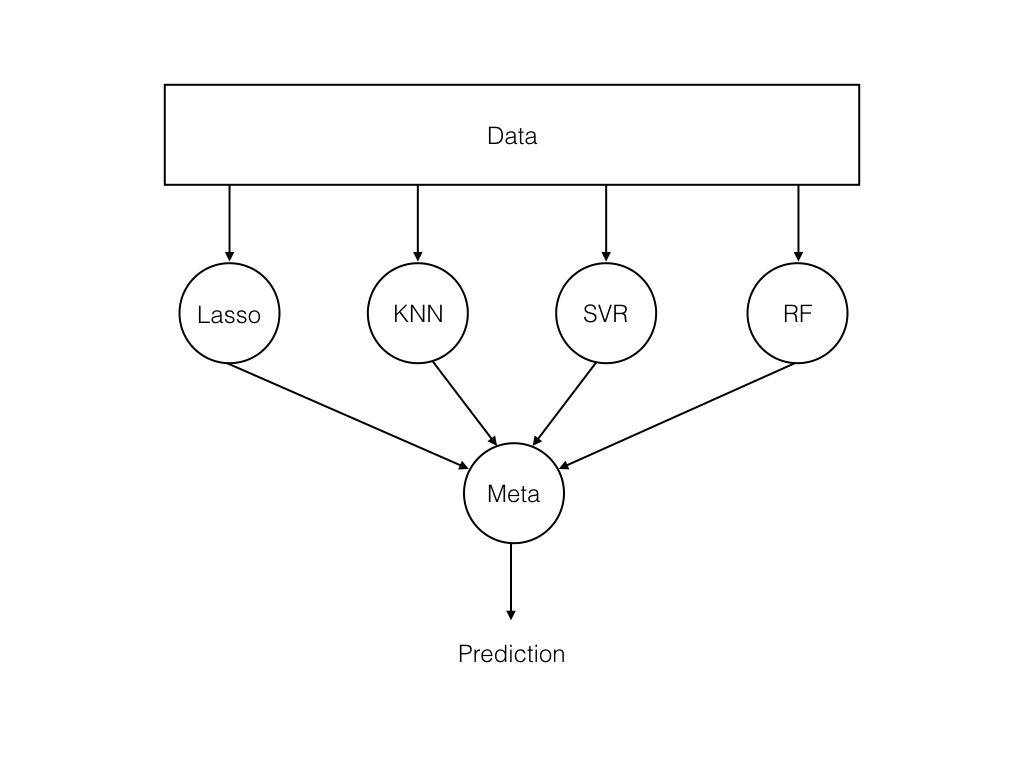

This Cricket Team explains-> how many algorithms together create better result.

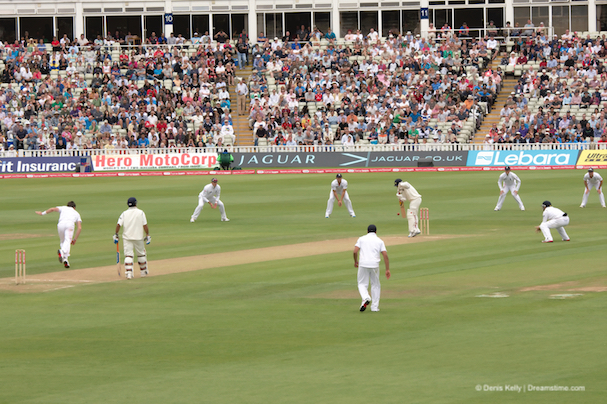

### Why Ensemble Learning 

The error emerging from any machine model can be broken down into three components mathematically. Following are these component:

###### Bias + Variance + Irreducible error

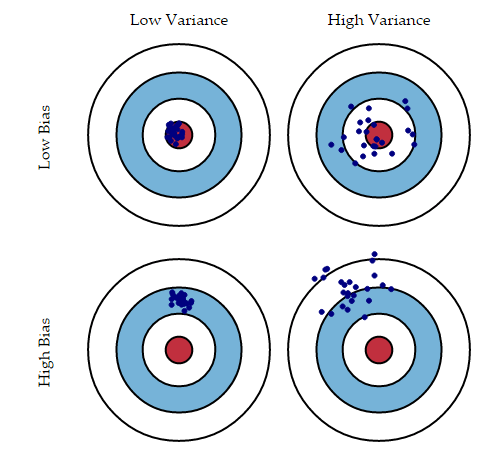

Bias error is useful to quantify how much on an average are the predicted values different from the actual value

Variance on the other side quantifies how are the prediction made on the same observation different from each other

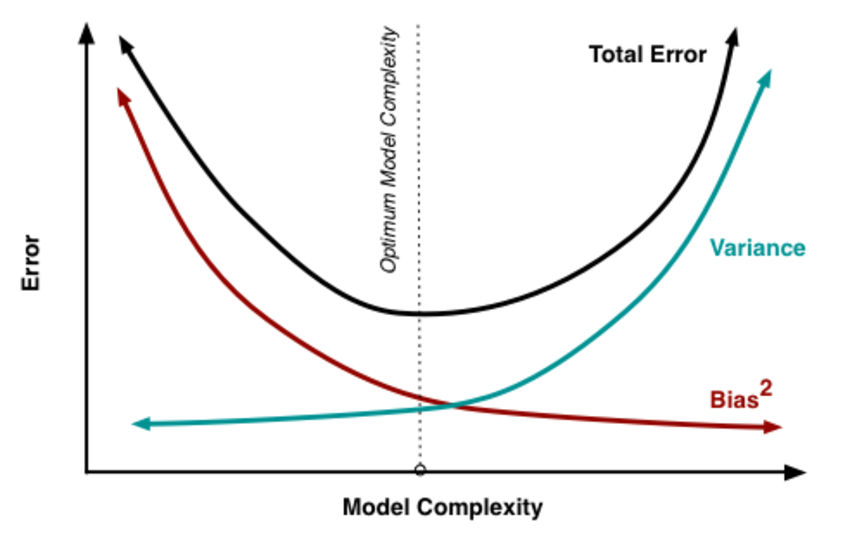

### Type of Ensemble Learning 

- Basic Ensemble Techniques
    - Max Voting
    - Averaging
    - Weighted Average
- Advanced Ensemble Techniques
    - Stacking
    - Blending
    - Bagging
    - Boosting
    
    

- Algorithms based on Bagging
    - Bagging meta-estimator
    - Random Forest

- Boosting Algorithms
    - AdaBoost
    - GBM
    - XGB
    - Light GBM
    - CatBoost    

**Max Voting**

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point.

**Averaging**

Similar to the max voting technique, multiple predictions are made for each data point in averaging.

**Weighted Average**

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

#### Bagging 

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

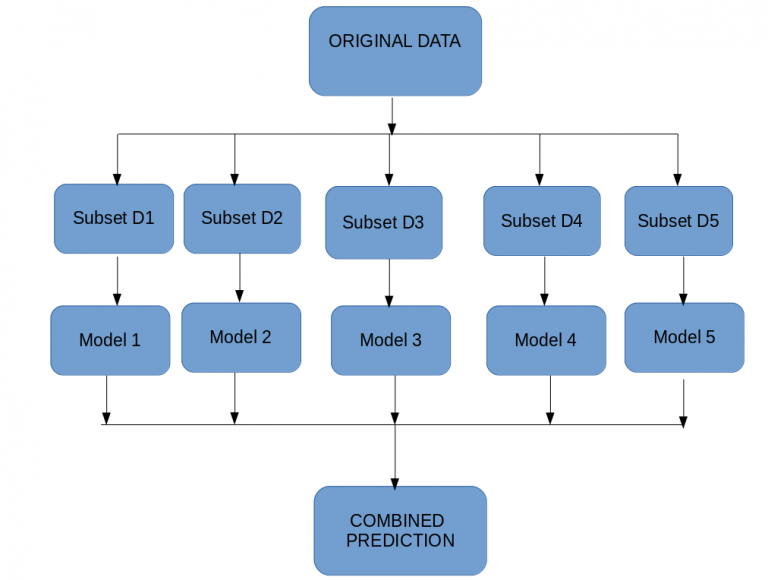

#### Boosting 

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

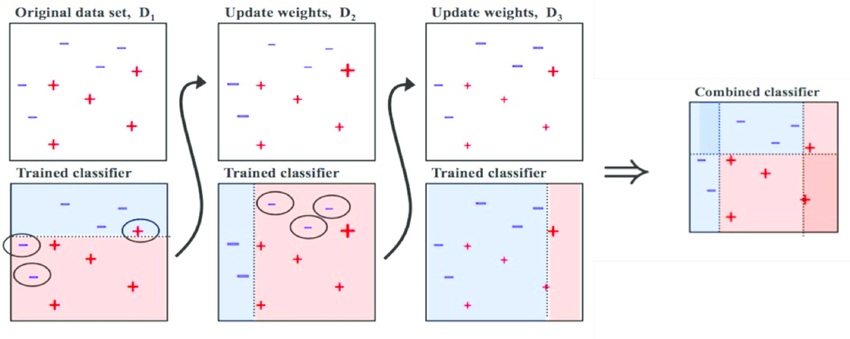

### Algorithms Implimentation in sklearn

- Bagging
    - Random Forest
- Boosting
    - XGBosst
    - AdaBoost
    - Gradient Boosting

**Random Forest** is another ensemble machine learning algorithm that follows the bagging technique

**XGBoost (extreme Gradient Boosting)** is an advanced implementation of the gradient boosting algorithm

**Adaptive boosting or AdaBoost** is one of the simplest boosting algorithms

**Gradient Boosting or GBM** is another ensemble machine learning algorithm that works for both regression and classification problems

#### Data Preparation 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
X = cancer.data
y = cancer.target

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1, stratify = y)

In [11]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state= 1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [12]:
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
print('Random Forest: ', rfc.score(X_test, y_test))
print('AdaBoost: ', abc.score(X_test, y_test))
print('Gradient Boost: ', gbc.score(X_test, y_test))
print('XGBoost: ', xgb_clf.score(X_test, y_test))

Random Forest:  0.9473684210526315
AdaBoost:  0.9473684210526315
Gradient Boost:  0.9736842105263158
XGBoost:  0.956140350877193
